In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
https://drive.google.com/file/d/12IV6fFbQTnhVzOdeZ4yLSqLb2Tvx8weO/view?usp=sharing

In [ ]:
!gdown --id 12IV6fFbQTnhVzOdeZ4yLSqLb2Tvx8weO  # Download File

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=12IV6fFbQTnhVzOdeZ4yLSqLb2Tvx8weO
To: /content/data_prep.csv
100% 36.4M/36.4M [00:00<00:00, 73.3MB/s]


In [ ]:
# read your data
data_prep = pd.read_csv('/content/data_prep.csv')

In [ ]:
data_prep

,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,...,tot_cur_bal,total_rev_hi_lim,issue_year,term,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business,target
0,-1.037768,-0.649428,2,10,2,-1.396774,1,2,1.471090,0.0,...,0.393541,0.478933,-1.135521,0,0,0,0,0,0,0
1,-1.395249,0.597076,3,10,2,-1.843693,2,2,-1.010128,0.0,...,0.393541,0.478933,-1.135521,0,0,0,0,0,1,0
2,-0.350303,0.017252,3,10,2,-0.438113,3,2,0.468379,0.0,...,0.393541,0.478933,-1.135521,0,0,0,1,0,0,0
3,-1.312753,1.226197,5,9,2,-0.483764,3,2,-1.451845,0.0,...,0.393541,0.478933,-1.135521,0,0,0,0,1,0,0
4,-0.955272,1.845928,6,4,1,-0.788100,3,2,-1.425630,0.0,...,0.393541,0.478933,-1.135521,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121546,-0.735283,0.367025,3,0,2,-0.978311,1,2,-0.785992,0.0,...,-1.370595,-1.945584,1.201936,0,1,0,0,0,0,0
121547,-0.075317,-0.879480,2,8,2,-0.750058,1,2,0.102685,0.0,...,-1.041972,-0.017415,1.201936,0,0,0,0,0,0,0
121548,0.034677,0.026642,2,10,3,2.024200,1,2,0.671543,0.0,...,2.540871,1.657047,1.201936,0,0,0,1,0,0,0
121549,0.254666,0.026642,2,1,2,2.255268,3,2,-0.065089,0.0,...,0.096264,1.383044,1.201936,0,1,0,0,0,0,0


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = data_prep.drop(['target', 'delinq_2yrs', 'pub_rec','collections_12_mths_ex_med','acc_now_delinq' , 'application_type','pymnt_plan','issue_year'], axis=1)
y = data_prep['target']

In [ ]:
data_prep['target'].value_counts()

target
0    95652
1    25899
Name: count, dtype: int64

## Imbalance Data

In [ ]:
# Handling imbalance data
from imblearn.over_sampling import SMOTE

oversampling = SMOTE(random_state=43, sampling_strategy=1)

In [ ]:
# Fit the over sampling
X, y = oversampling.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 12)

In [ ]:
X_train.shape

(153043, 23)

In [ ]:
X_test.shape

(38261, 23)

In [ ]:
y_train.shape

(153043,)

In [ ]:
y_train.value_counts()

target
0    76541
1    76502
Name: count, dtype: int64

In [ ]:
y_test.shape

(38261,)

In [ ]:
y_test.value_counts()

target
1    19150
0    19111
Name: count, dtype: int64

# Training Model

Models:

Logistic Regression

*   Logistic Regression
*   Random Forest
*   Decision Tree
*   Gradient Boosting
*   Naive Bayes
*   XGBoost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_validate

In [ ]:
def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model,X,y,cv=5,scoring='roc_auc',return_train_score=True)
    print("roc_auc (crossval test): %.2f" % score['test_score'].mean())
    print("roc_auc (crossval train): %.2f" % score['train_score'].mean())


def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [ ]:
def plotting_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)

    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    fig, ax = plt.subplots(1, 1, figsize=(9,6))
    sns.set(font_scale=0.8)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm', annot_kws={'size': 12},
                yticklabels=['Bad','Good'], xticklabels=['Bad','Good'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix ' + title, fontsize=14)
    plt.show()

## Logistic Regression

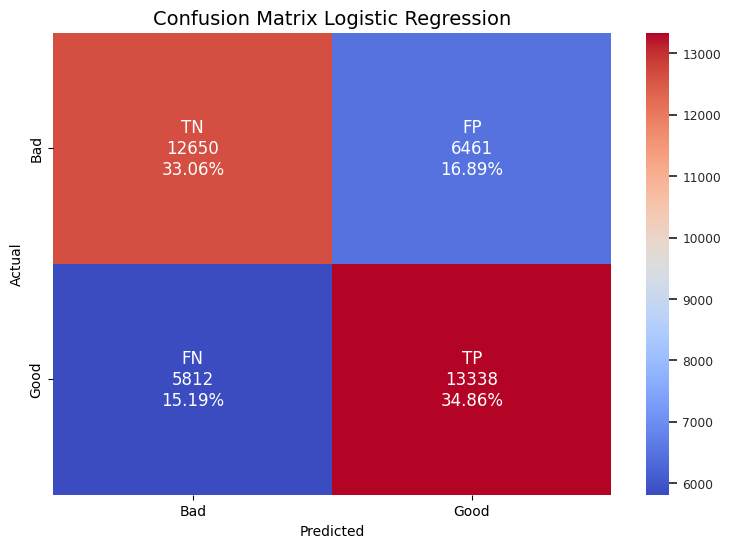

Accuracy (Test Set): 0.68
Precision (Test Set): 0.67
Recall (Test Set): 0.70
F1-Score (Test Set): 0.68
roc_auc (test-proba): 0.74
roc_auc (train-proba): 0.75
roc_auc (crossval test): 0.68
roc_auc (crossval train): 0.75


<bound method BaseEstimator.get_params of LogisticRegression(random_state=42)>

In [ ]:
model_LR = LogisticRegression(random_state=42)
model_LR.fit(X_train, y_train)

plotting_confusion_matrix(model_LR, X_test, y_test, title='Logistic Regression')
eval_classification(model_LR, X_train, y_train, X_test, y_test)
model_LR.get_params

## Random Forest

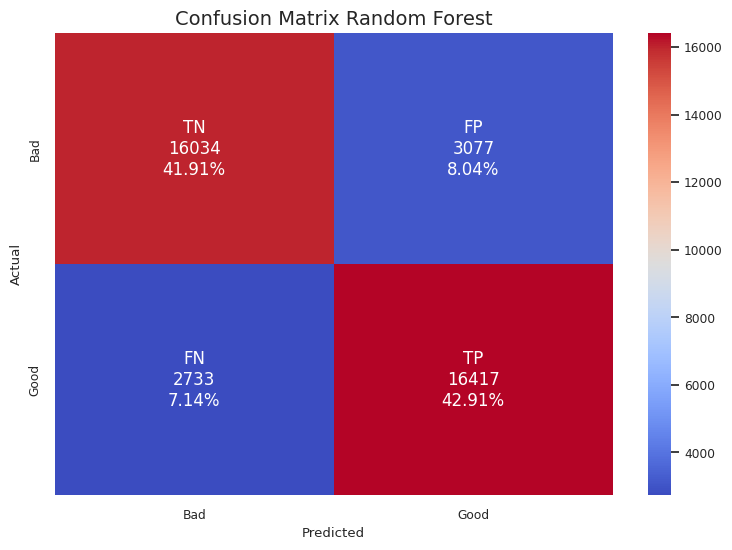

Accuracy (Test Set): 0.85
Precision (Test Set): 0.84
Recall (Test Set): 0.86
F1-Score (Test Set): 0.85
roc_auc (test-proba): 0.93
roc_auc (train-proba): 1.00
roc_auc (crossval test): 0.85
roc_auc (crossval train): 1.00


<bound method BaseEstimator.get_params of RandomForestClassifier(random_state=42)>

In [ ]:
model_RF = RandomForestClassifier(random_state=42)
model_RF.fit(X_train, y_train)

plotting_confusion_matrix(model_RF, X_test, y_test, title='Random Forest')
eval_classification(model_RF, X_train, y_train, X_test, y_test)
model_RF.get_params

## Decision Tree

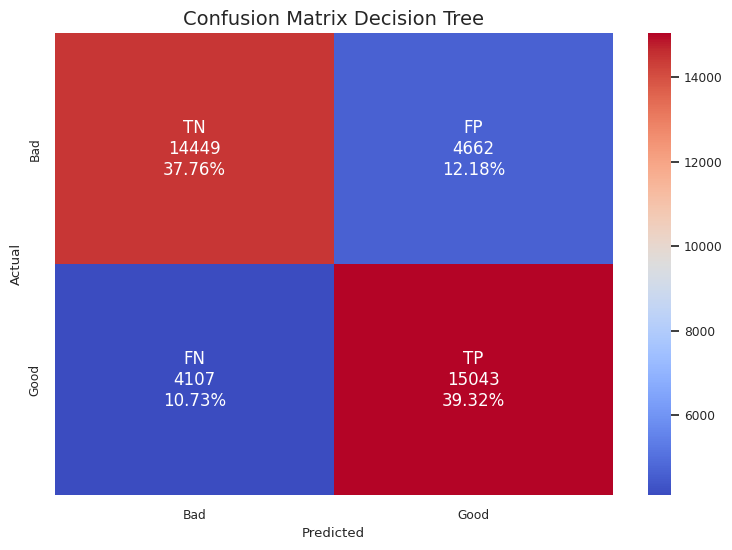

Accuracy (Test Set): 0.77
Precision (Test Set): 0.76
Recall (Test Set): 0.79
F1-Score (Test Set): 0.77
roc_auc (test-proba): 0.77
roc_auc (train-proba): 1.00
roc_auc (crossval test): 0.61
roc_auc (crossval train): 1.00


<bound method BaseEstimator.get_params of DecisionTreeClassifier(random_state=42)>

In [ ]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train, y_train)

plotting_confusion_matrix(model_DT, X_test, y_test, title='Decision Tree')
eval_classification(model_DT, X_train, y_train, X_test, y_test)
model_DT.get_params

## Gradient Boosting

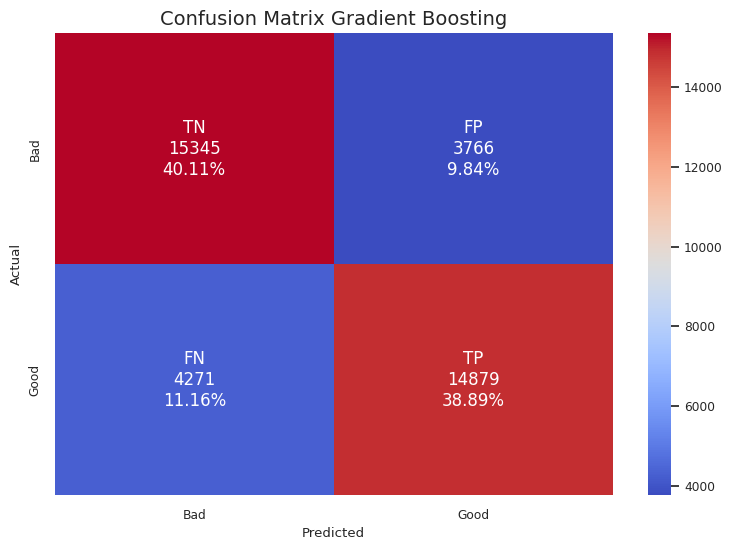

Accuracy (Test Set): 0.79
Precision (Test Set): 0.80
Recall (Test Set): 0.78
F1-Score (Test Set): 0.79
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.88
roc_auc (crossval test): 0.82
roc_auc (crossval train): 0.88


<bound method BaseEstimator.get_params of GradientBoostingClassifier(random_state=42)>

In [ ]:
model_GBC = GradientBoostingClassifier(random_state=42)
model_GBC.fit(X_train, y_train)

plotting_confusion_matrix(model_GBC, X_test, y_test, title='Gradient Boosting')
eval_classification(model_GBC, X_train, y_train, X_test, y_test)
model_GBC.get_params

## Naive Bayes

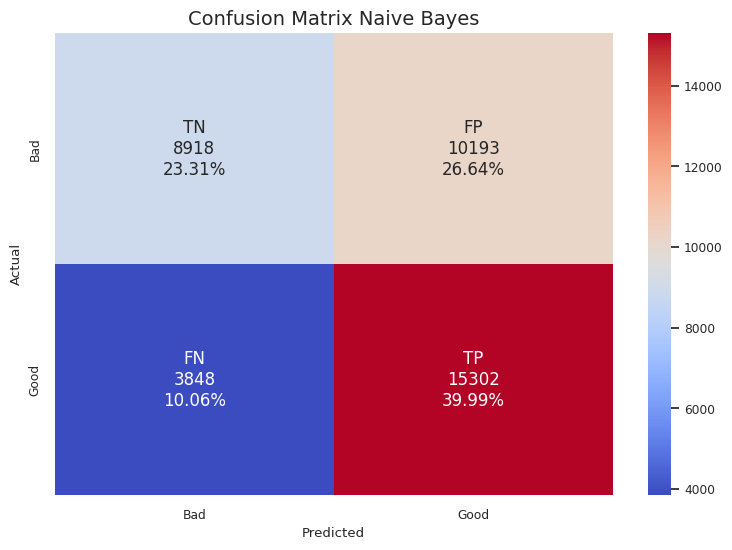

Accuracy (Test Set): 0.63
Precision (Test Set): 0.60
Recall (Test Set): 0.80
F1-Score (Test Set): 0.69
roc_auc (test-proba): 0.70
roc_auc (train-proba): 0.71
roc_auc (crossval test): 0.68
roc_auc (crossval train): 0.71


<bound method BaseEstimator.get_params of GaussianNB()>

In [ ]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

plotting_confusion_matrix(model_NB, X_test, y_test, title='Naive Bayes')
eval_classification(model_NB, X_train, y_train, X_test, y_test)
model_NB.get_params

## XGBoost

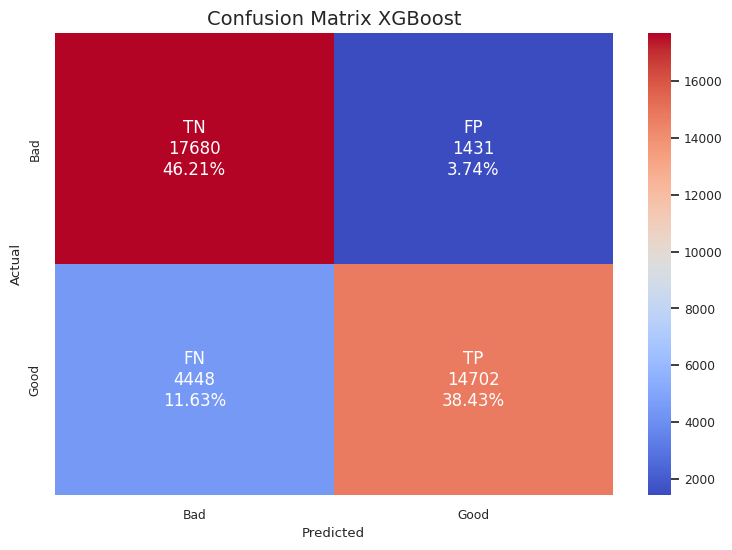

Accuracy (Test Set): 0.85
Precision (Test Set): 0.91
Recall (Test Set): 0.77
F1-Score (Test Set): 0.83
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.94
roc_auc (crossval test): 0.82
roc_auc (crossval train): 0.94


<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)>

In [ ]:
model_XGB = XGBClassifier(random_state=42)
model_XGB.fit(X_train, y_train)

plotting_confusion_matrix(model_XGB, X_test, y_test, title='XGBoost')
eval_classification(model_XGB, X_train, y_train, X_test, y_test)
model_XGB.get_params

### Tuning

In [ ]:
#params = {
    'n_estimators': [1, 2, 3, 4],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [1, 2, 3, 5]
}

#model_Xgb_H = XGBClassifier(random_state=42)
#model_Xgb_H = XGBClassifier(random_state=42, class_weight='balanced')
#kfold11 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#grid_search6 = GridSearchCV(model_Xgb_H, param_grid = params, scoring = 'recall', cv = kfold11)
#grid_search6.fit(X_train, y_train)

#print('Best parameters: ', grid_search6.best_params_)

Best parameters:  {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 1}


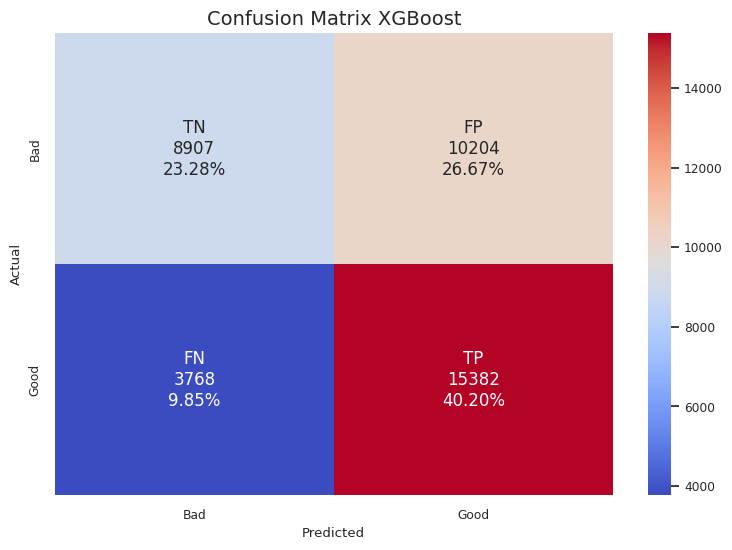

Accuracy (Test Set): 0.63
Precision (Test Set): 0.60
Recall (Test Set): 0.80
F1-Score (Test Set): 0.69
roc_auc (test-proba): 0.63
roc_auc (train-proba): 0.64
roc_auc (crossval test): 0.55
roc_auc (crossval train): 0.65


<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)>

In [ ]:
#model_Xgb_H = XGBClassifier(learning_rate = 0.01, max_depth = 1, n_estimators = 1)
#model_Xgb_H.fit(X_train, y_train)

#plotting_confusion_matrix(model_Xgb_H, X_test, y_test, title='XGBoost')
#eval_classification(model_Xgb_H, X_train, y_train, X_test, y_test)
#model_Xgb_H.get_params

# Feature Importance

In [ ]:
def show_feature_importance(model, title):
    if type(model).__name__ == 'XGboost':
        feat_importances = pd.Series(model.coef_[0], index=X.columns)
    else:
        feat_importances = pd.Series(model.feature_importances_, index=X.columns)

    ax = feat_importances.sort_values(ascending=False).plot(kind='barh', figsize=(10, 8), color='green')
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Features')
    plt.title('Feature Importance ' + title)

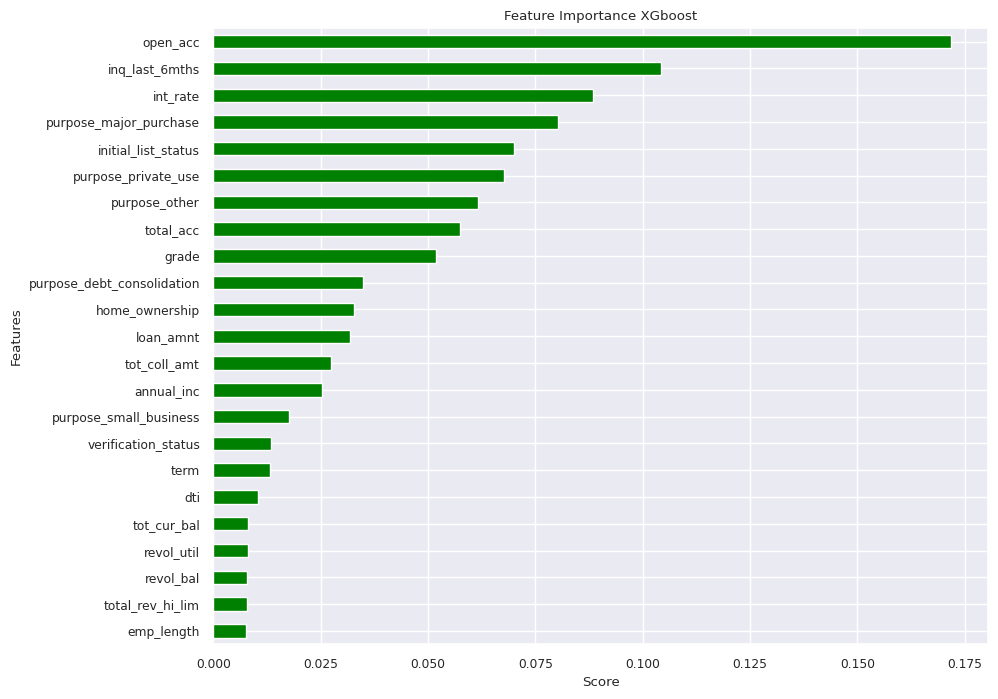

In [ ]:
# XGBoost
show_feature_importance(model_XGB, title='XGboost')

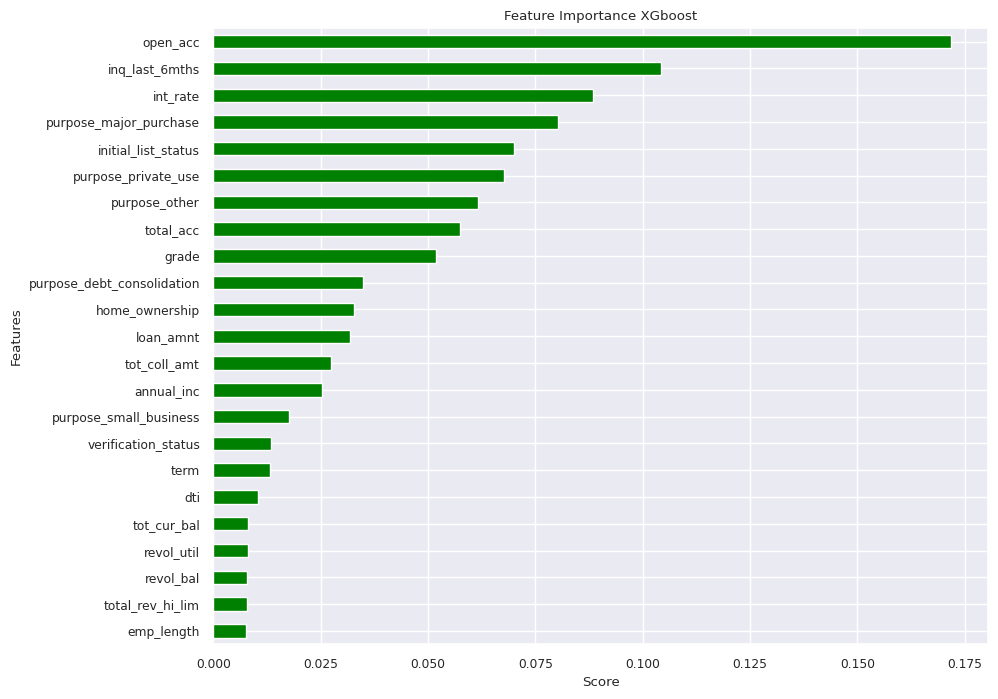

In [ ]:
# XGBoost
show_feature_importance(model_XGB_IY, title='XGboost')